In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
data = pd.read_csv("Unemployment in India.csv")
print(data.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [17]:

# Check for missing values and datatypes

print(data.info())
print(data.isnull().sum())

# Rename columns for simplicity (if needed)
data.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Region']

# Convert Date to datetime
data['Date'] = pd.to_datetime(data['Date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None
Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated 

C:\Users\adith\AppData\Local\Temp\ipykernel_28652\302592339.py:9: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


In [5]:
print(data.describe())
print(data['States'].value_counts())
print(data['Region'].unique())


                                Date  Estimated Unemployment Rate  \
count                            740                   740.000000   
mean   2019-12-12 18:36:58.378378496                    11.787946   
min              2019-05-31 00:00:00                     0.000000   
25%              2019-08-31 00:00:00                     4.657500   
50%              2019-11-30 00:00:00                     8.350000   
75%              2020-03-31 00:00:00                    15.887500   
max              2020-06-30 00:00:00                    76.740000   
std                              NaN                    10.721298   

       Estimated Employed  Estimated Labour Participation Rate  
count        7.400000e+02                           740.000000  
mean         7.204460e+06                            42.630122  
min          4.942000e+04                            13.330000  
25%          1.190404e+06                            38.062500  
50%          4.744178e+06                            

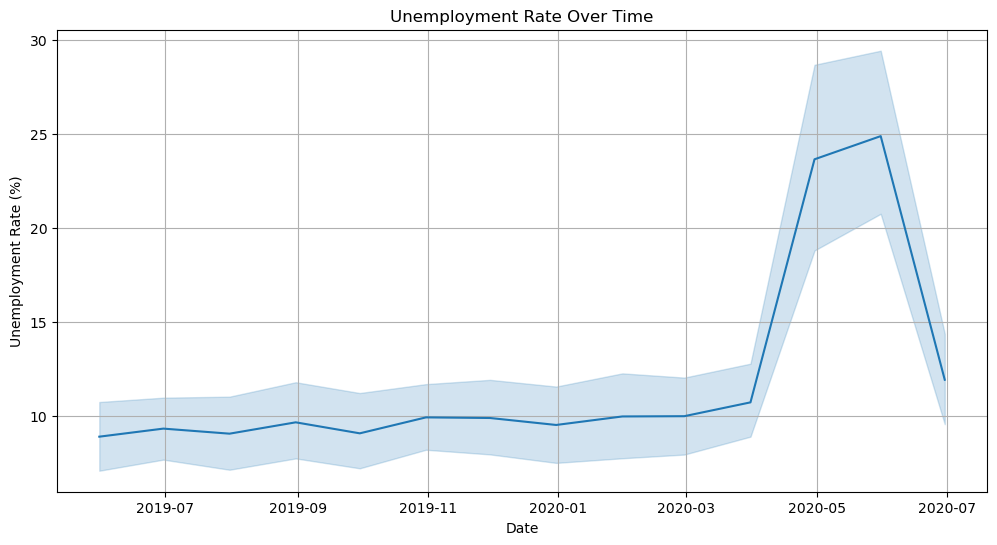

In [6]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate', data=data)
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()


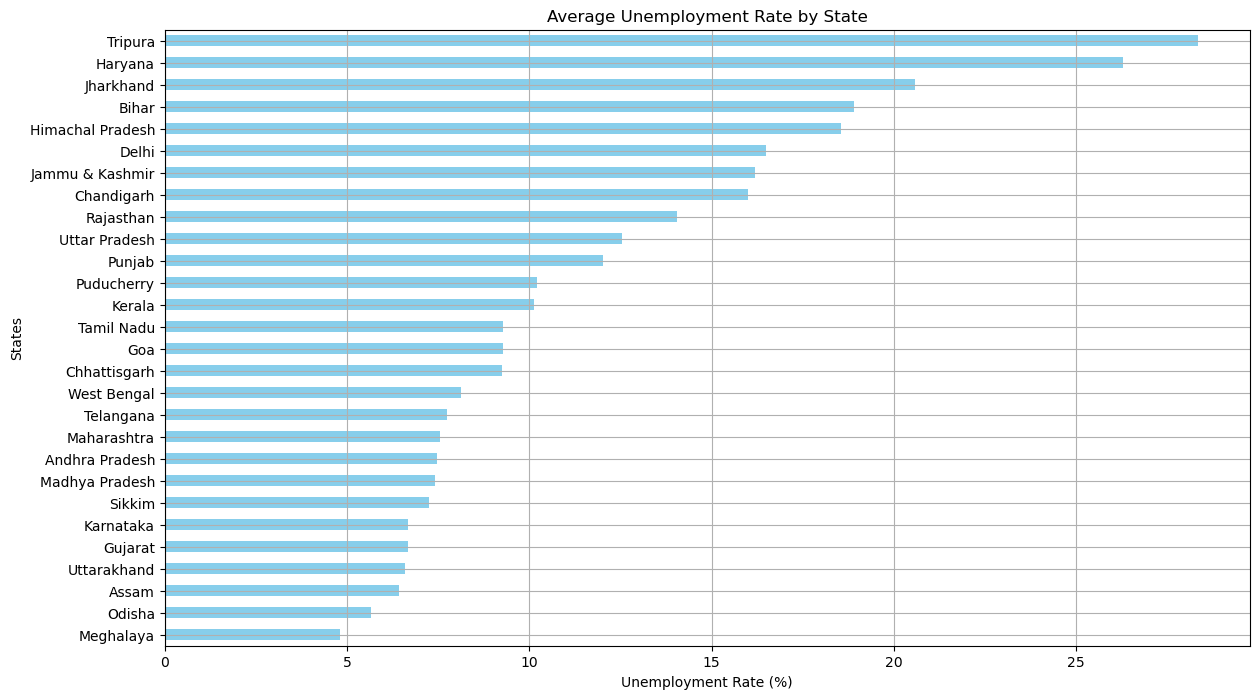

In [7]:
state_avg = data.groupby('States')['Estimated Unemployment Rate'].mean().sort_values()
plt.figure(figsize=(14, 8))
state_avg.plot(kind='barh', color='skyblue')
plt.title('Average Unemployment Rate by State')
plt.xlabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()


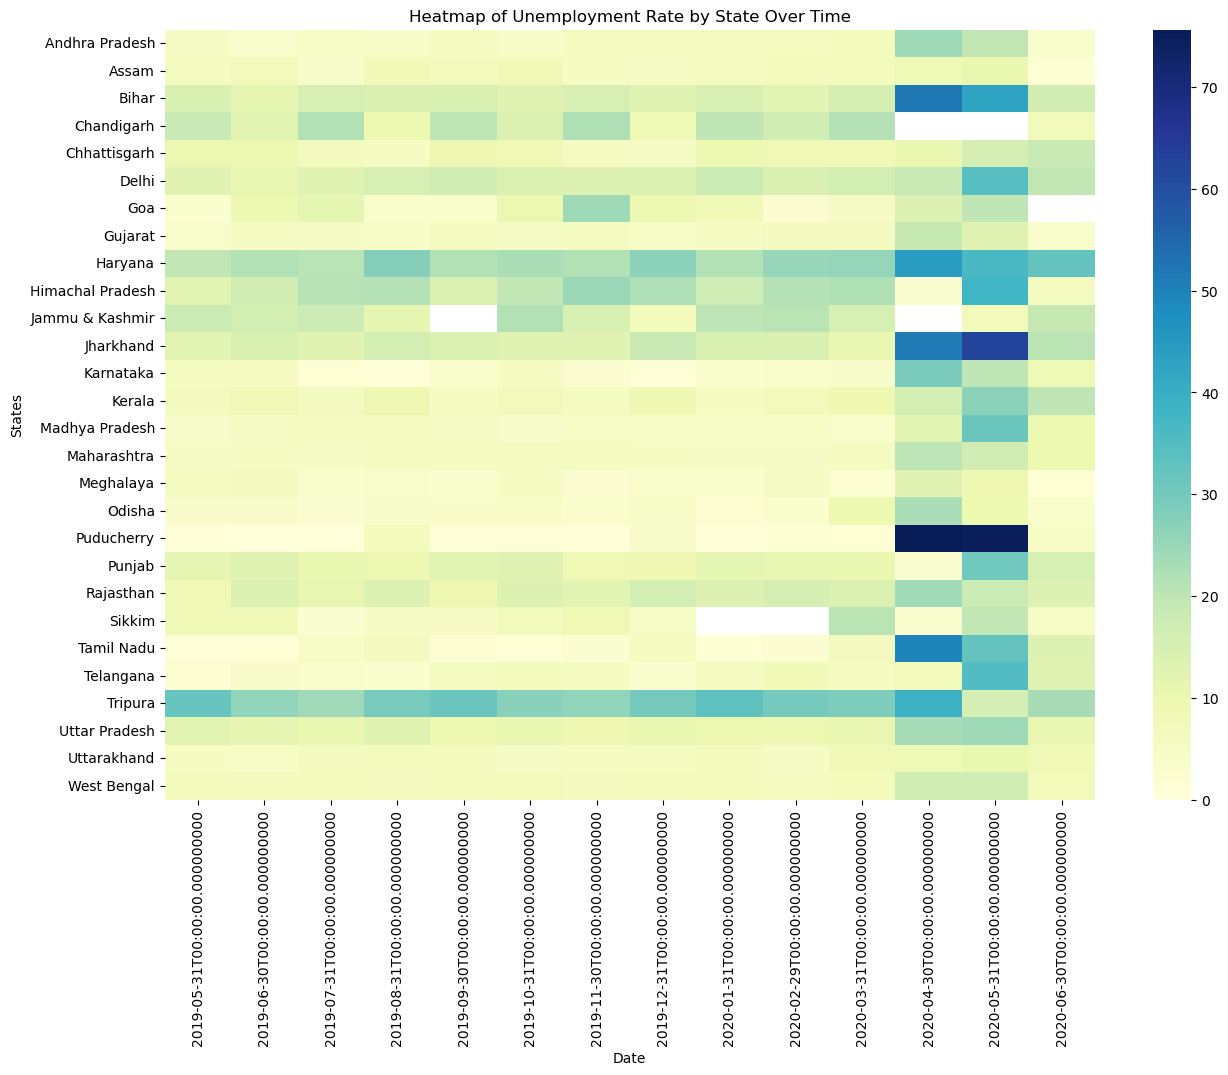

In [8]:
pivot_data = data.pivot_table(values='Estimated Unemployment Rate', index='Date', columns='States')
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_data.T, cmap='YlGnBu')
plt.title('Heatmap of Unemployment Rate by State Over Time')
plt.show()


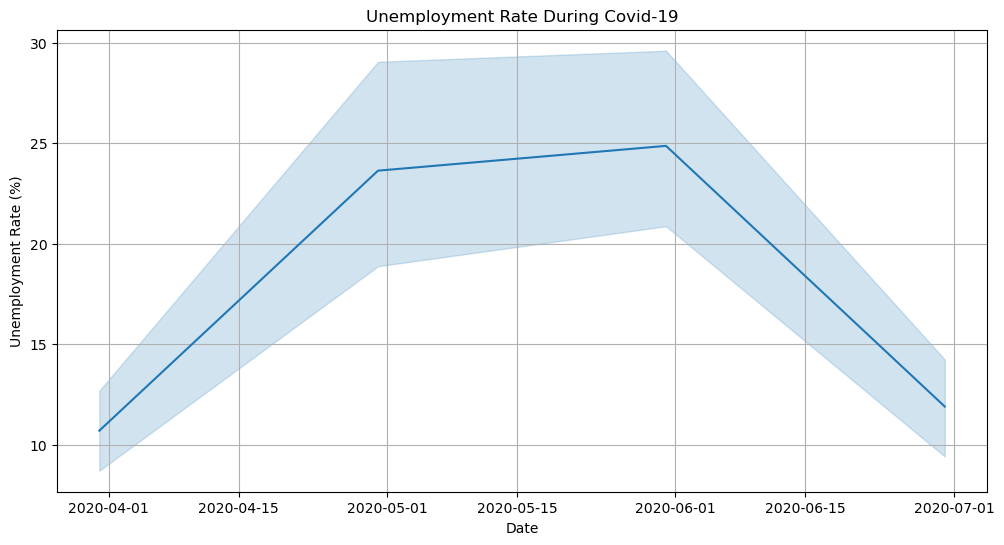

In [9]:
covid_data = data[(data['Date'] >= '2020-03-01') & (data['Date'] <= '2021-06-30')]

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate', data=covid_data)
plt.title('Unemployment Rate During Covid-19')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()


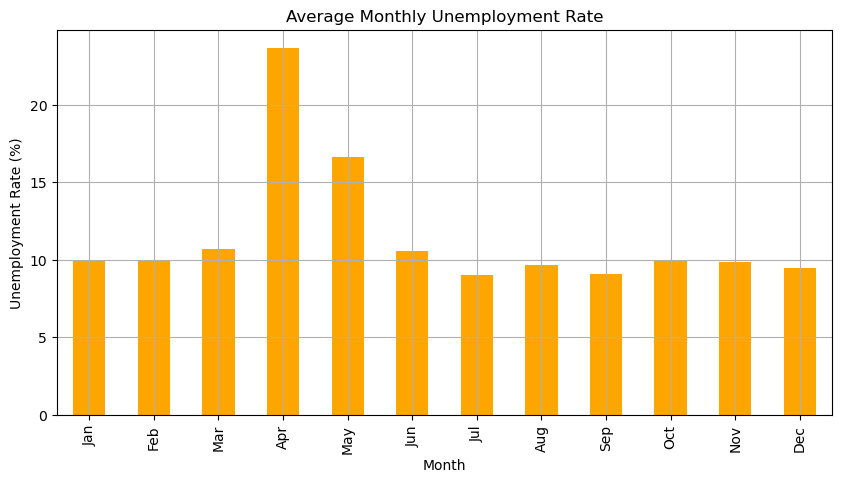

In [10]:
data['Month'] = data['Date'].dt.month
monthly_avg = data.groupby('Month')['Estimated Unemployment Rate'].mean()

plt.figure(figsize=(10, 5))
monthly_avg.plot(kind='bar', color='orange')
plt.title('Average Monthly Unemployment Rate')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


In [12]:
data.to_csv("Cleaned_Unemployment_Data.csv", index=False)
